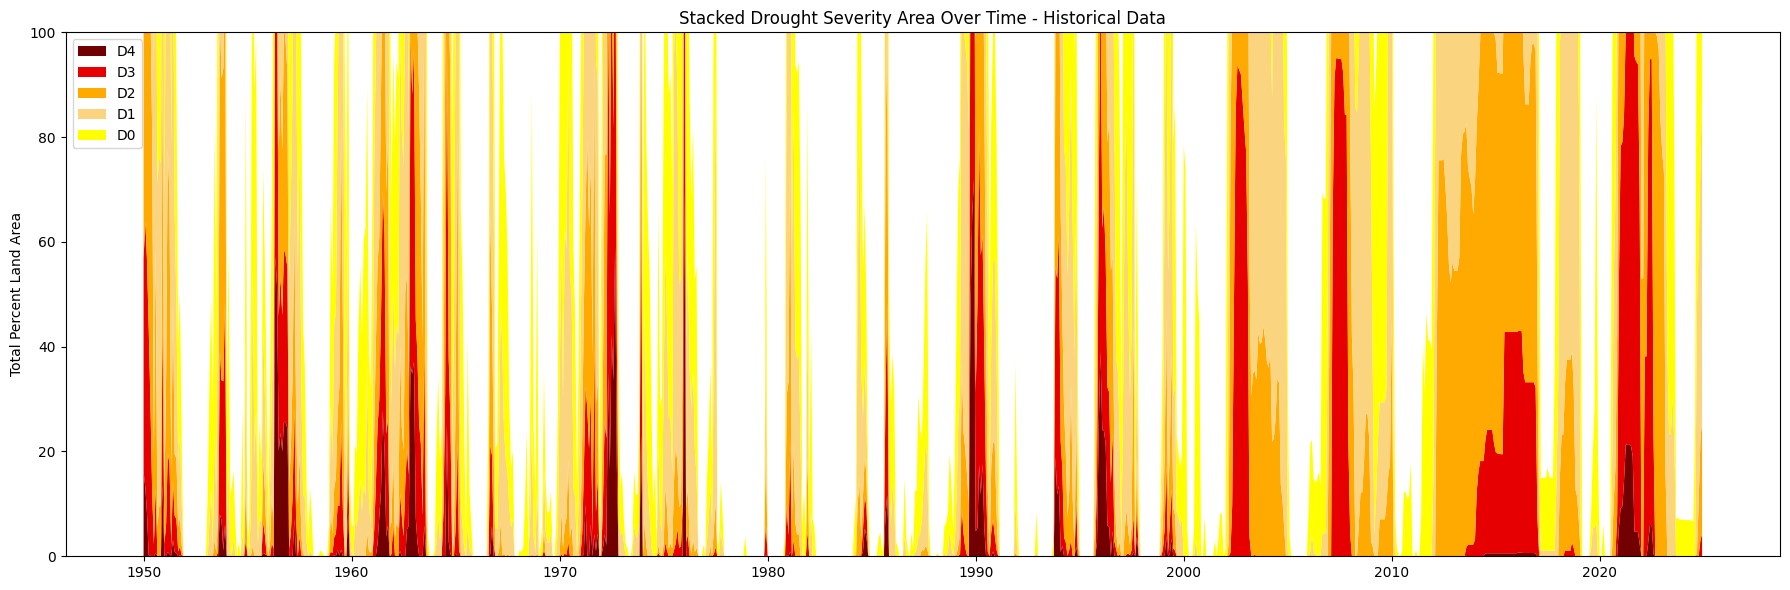

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual path if needed)
df = pd.read_csv('./final_historical.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time - Historical Data")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



====== RandomForest Full Data Prediction ======
D0 - MAE: 3.4447, R²: 0.9797


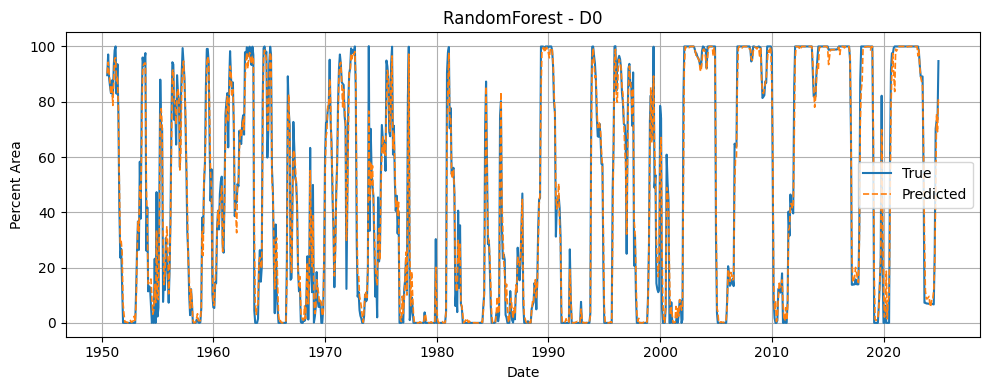

D1 - MAE: 3.0628, R²: 0.9802


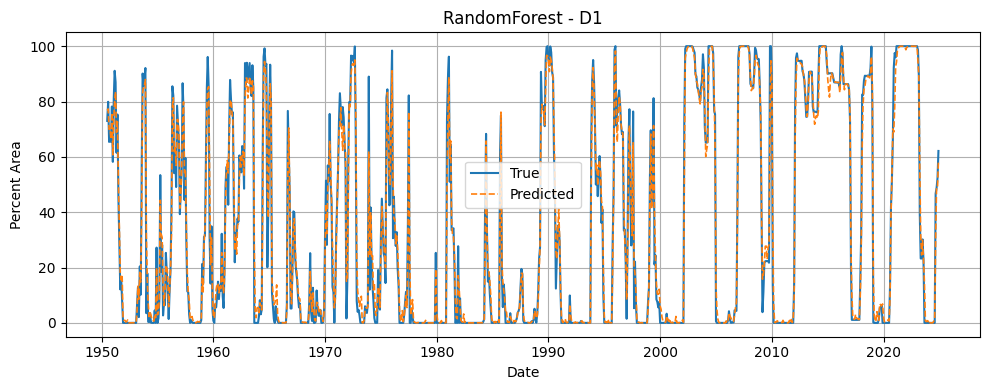

D2 - MAE: 2.1820, R²: 0.9788


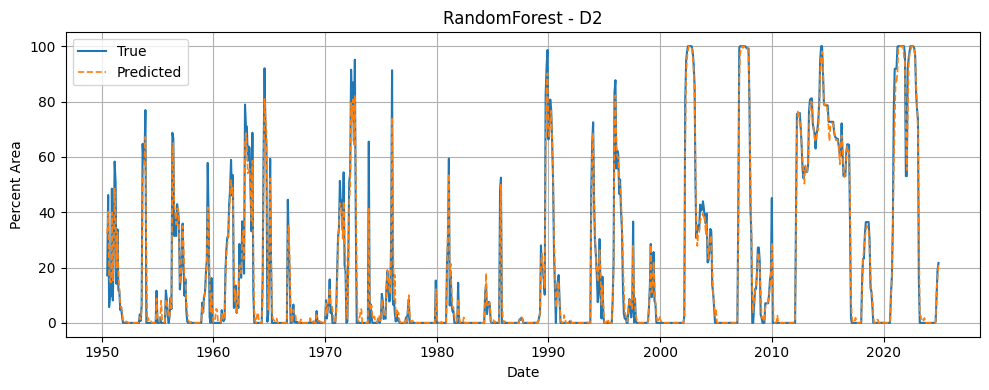

D3 - MAE: 1.4359, R²: 0.9693


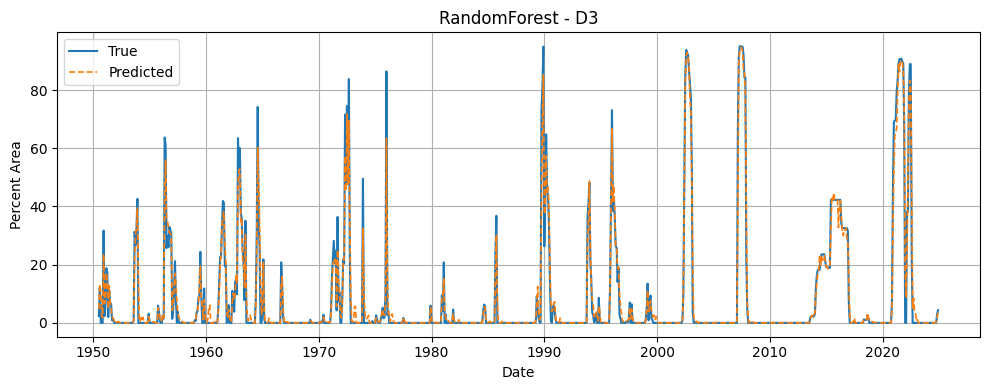

D4 - MAE: 0.5351, R²: 0.9399


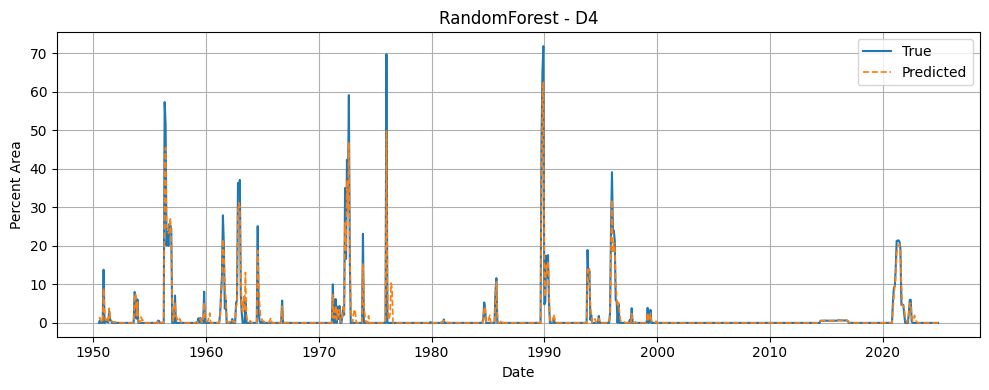

✅ Saved full predictions to 'predicted_drought_rf_full.csv'


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 0: Load data
final_historical_df = pd.read_csv('./final_historical.csv')

# Step 1: Feature Engineering
df = final_historical_df.copy()
df['date'] = pd.to_datetime(df['date'])

for col in ['D0', 'D1', 'D2', 'D3', 'D4']:
    for lag in range(1, 4):
        df[f'{col}_lag{lag}'] = df[col].shift(lag)
    df[f'{col}_roll_mean'] = df[col].rolling(window=7).mean()
    df[f'{col}_roll_std'] = df[col].rolling(window=7).std()

df = df.dropna().reset_index(drop=True)

# Step 2: Features and Targets
X = df.drop(columns=['date', 'D0', 'D1', 'D2', 'D3', 'D4'])
y = df[['D0', 'D1', 'D2', 'D3', 'D4']]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train and predict on all data
full_predictions = []
results = {}

print("\n====== RandomForest Full Data Prediction ======")
for i, target in enumerate(['D0', 'D1', 'D2', 'D3', 'D4']):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_scaled, y.iloc[:, i].values)
    y_pred = model.predict(X_scaled)
    full_predictions.append(y_pred)

    mae = mean_absolute_error(y.iloc[:, i].values, y_pred)
    r2 = r2_score(y.iloc[:, i].values, y_pred)
    results[target] = {'MAE': mae, 'R2': r2}

    print(f"{target} - MAE: {mae:.4f}, R²: {r2:.4f}")

    # Plot true vs predicted
    plt.figure(figsize=(10, 4))
    plt.plot(df['date'], y.iloc[:, i].values, label='True', linewidth=1.5)
    plt.plot(df['date'], y_pred, label='Predicted', linewidth=1.2, linestyle='--')
    plt.title(f"RandomForest - {target}")
    plt.xlabel("Date")
    plt.ylabel("Percent Area")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 4: Save full predictions
full_pred_df = pd.DataFrame(full_predictions).T
full_pred_df.columns = ['D0', 'D1', 'D2', 'D3', 'D4']
full_pred_df.insert(0, 'date', df['date'])

full_pred_df.to_csv('predicted_drought_rf_full.csv', index=False)
print("✅ Saved full predictions to 'predicted_drought_rf_full.csv'")


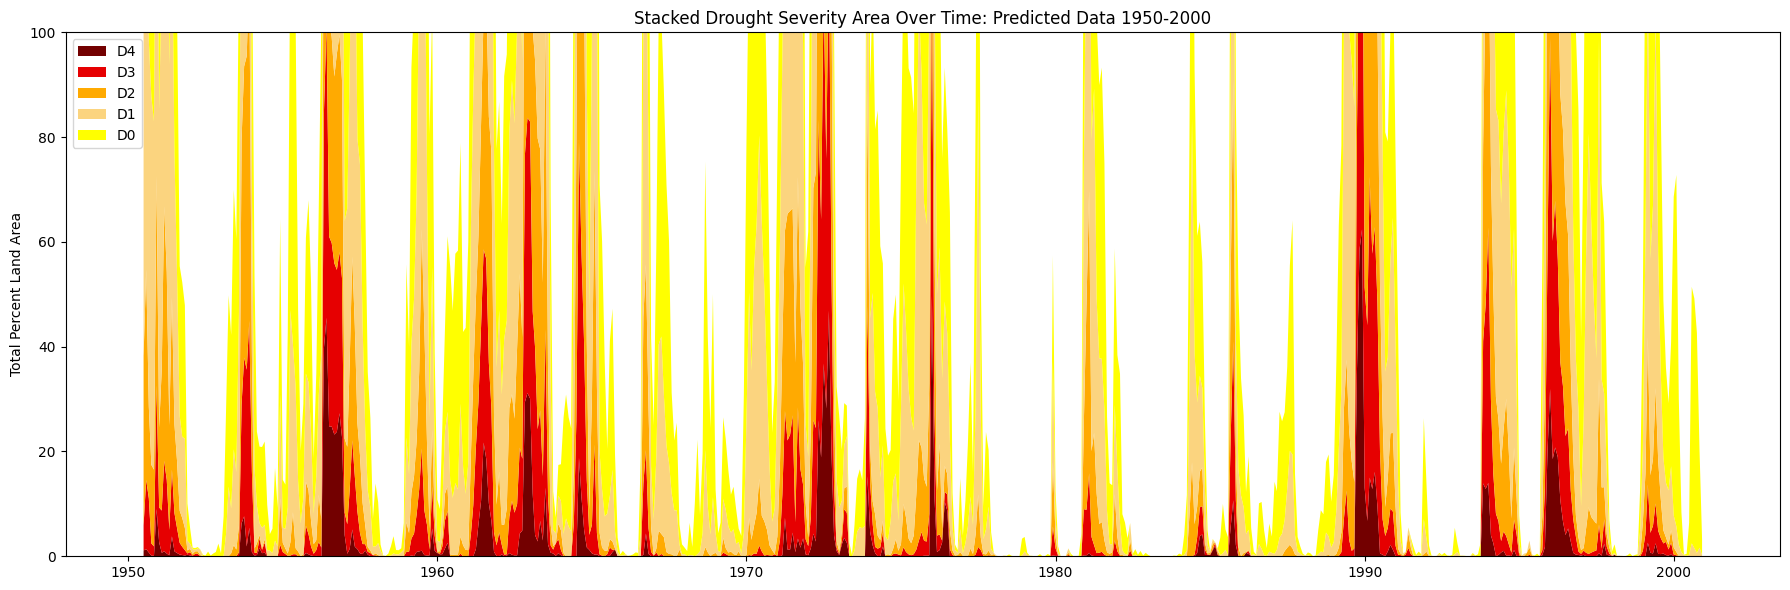

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual path if needed)
df = pd.read_csv('predicted_drought_rf_full.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter for 1950 to 2000
start_date = '1950-01-01'
end_date = '2000-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)


d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
# plt.stackplot(df['date'], d0, d1, d2, d3, d4,
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               colors=['#ffff00', '#fdae61', '#f46d43', '#d73027', '#7f0000'])

plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time: Predicted Data 1950-2000")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## comparing historical and predicted data 1950-2024

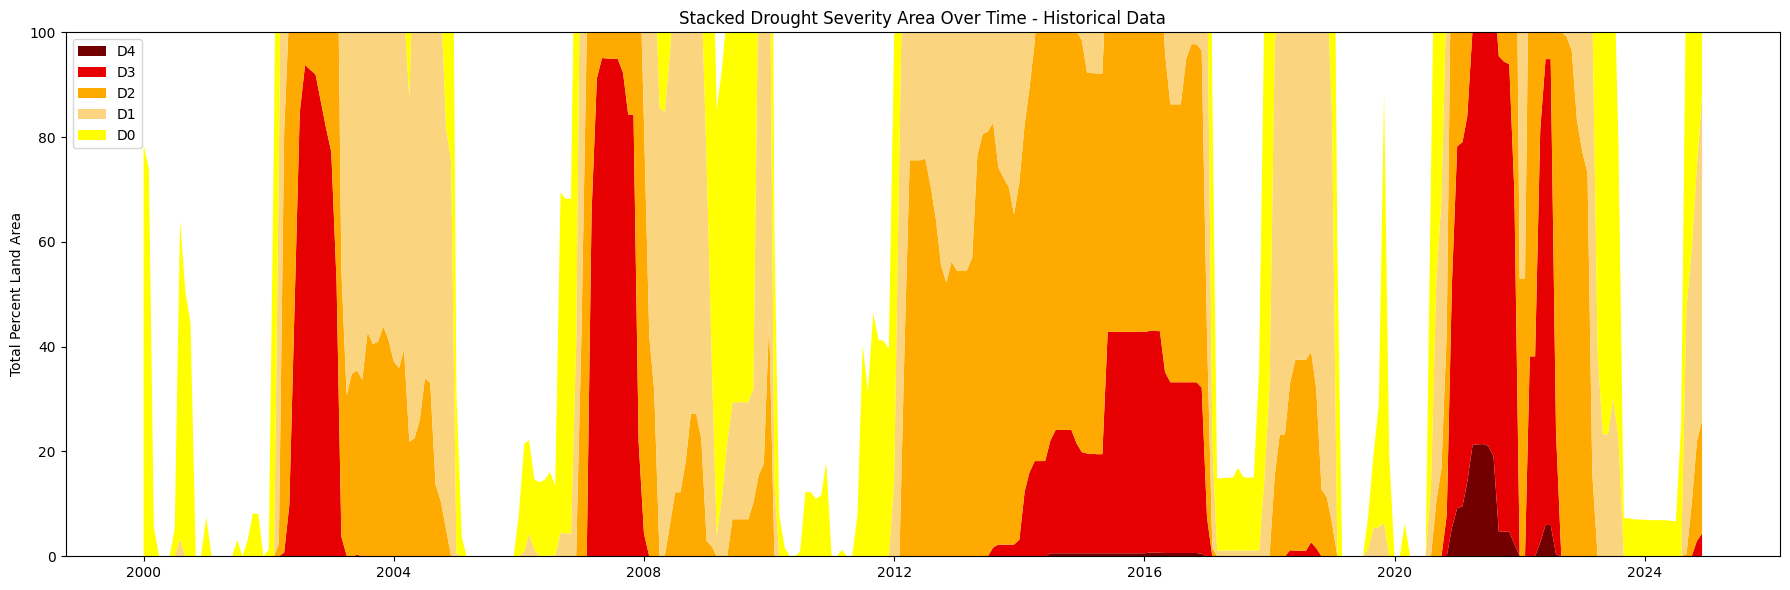

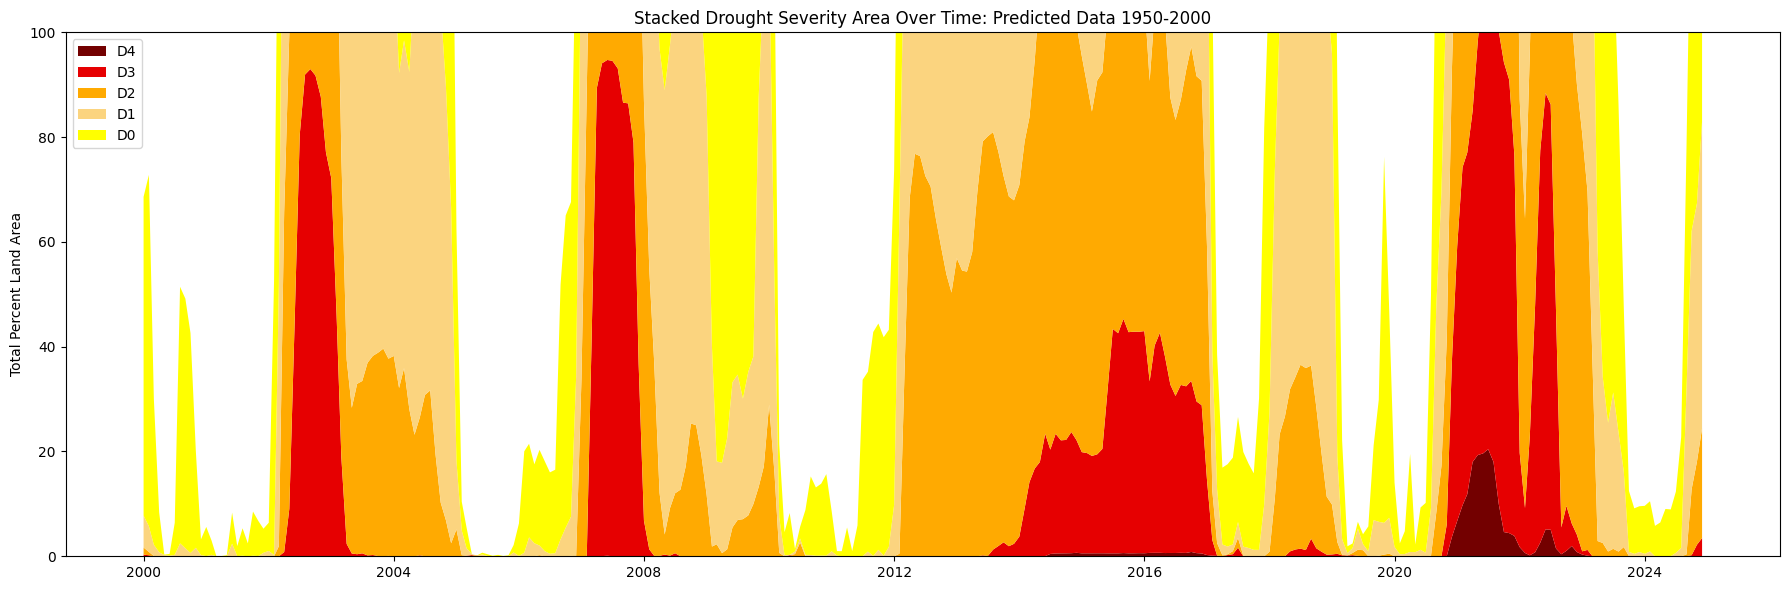

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual path if needed)
df = pd.read_csv('./final_historical.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
start_date = '2000-01-01'
end_date = '2024-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)

d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time - Historical Data")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Load your data (replace with your actual path if needed)
df = pd.read_csv('predicted_drought_rf_full.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter for 1950 to 2000
start_date = '2000-01-01'
end_date = '2024-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)


d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
# plt.stackplot(df['date'], d0, d1, d2, d3, d4,
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               colors=['#ffff00', '#fdae61', '#f46d43', '#d73027', '#7f0000'])

plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time: Predicted Data 1950-2000")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


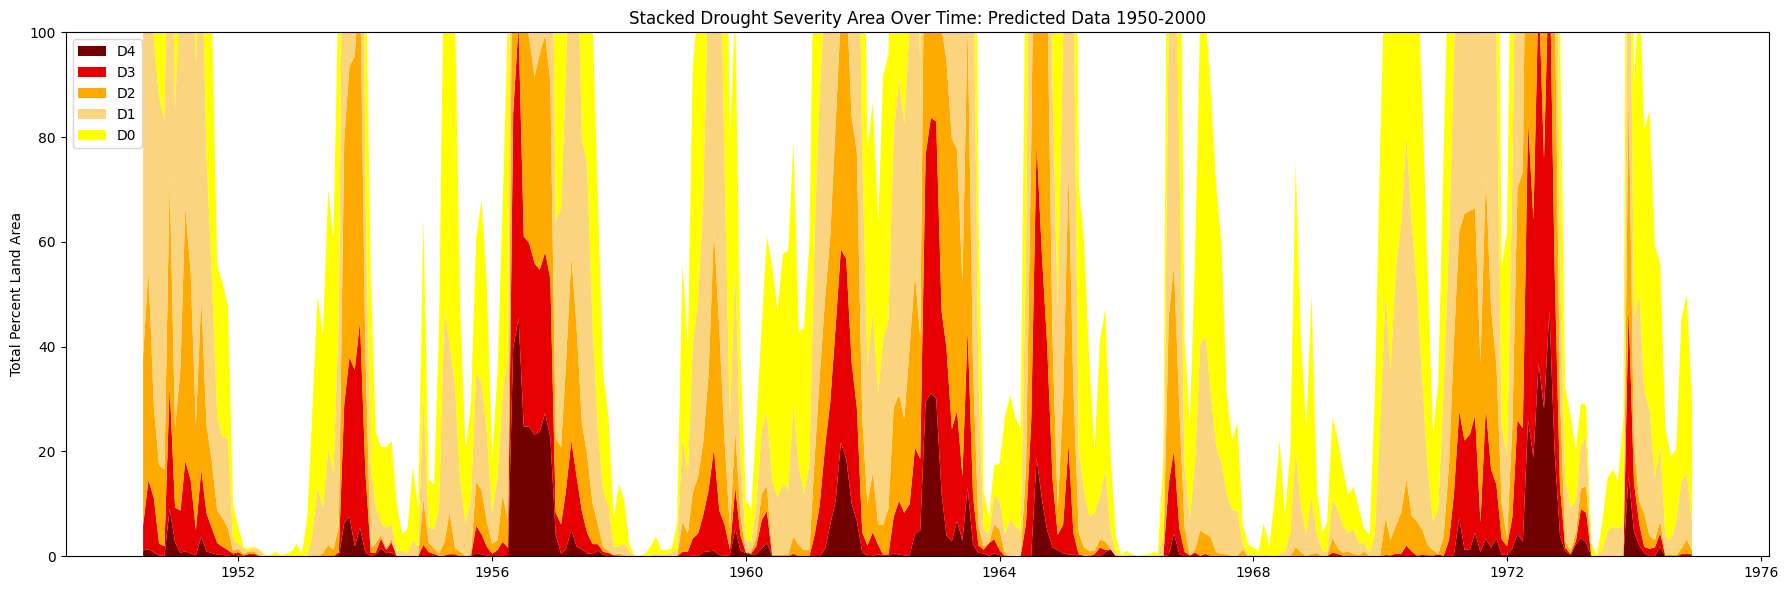

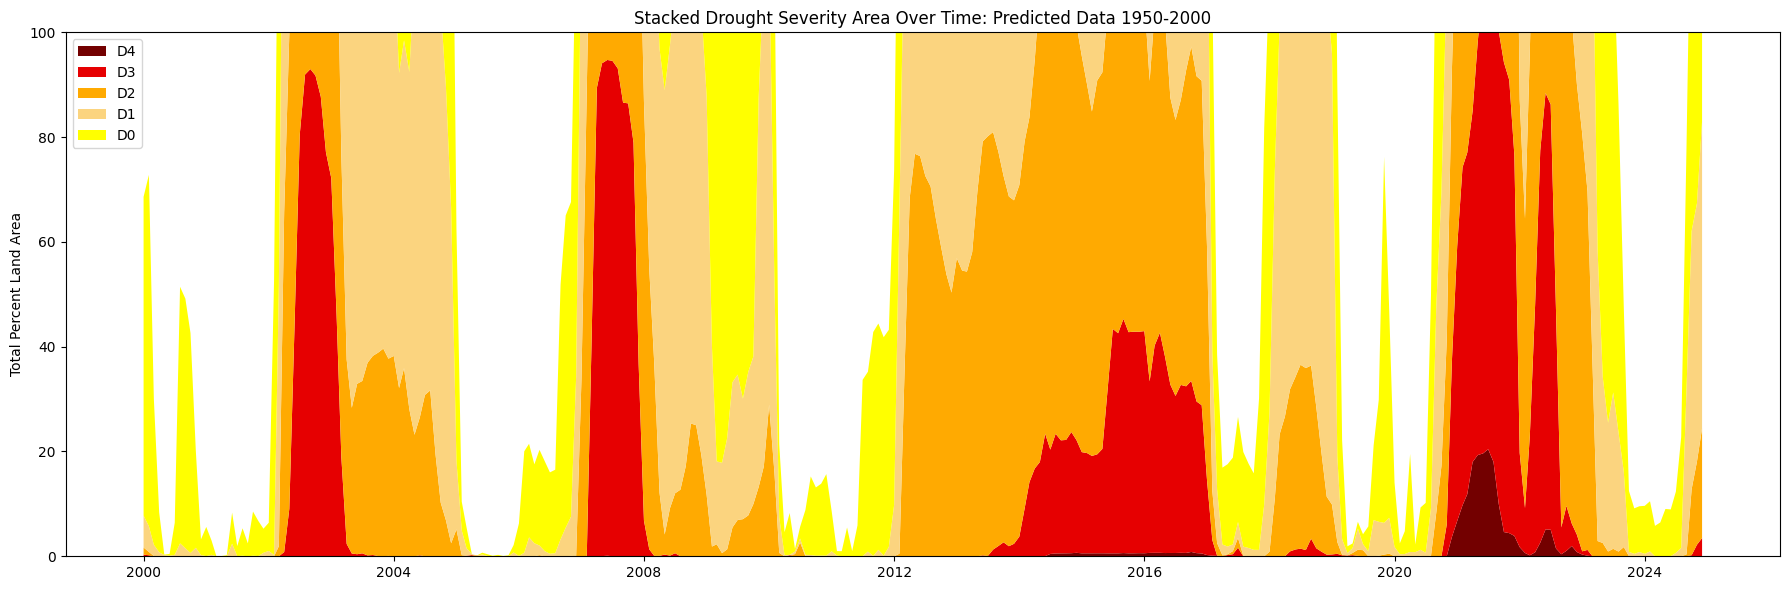

In [34]:
# Load your data (replace with your actual path if needed)
df = pd.read_csv('predicted_drought_rf_full.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter for 1950 to 2000
start_date = '1950-01-01'
end_date = '1974-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)


d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
# plt.stackplot(df['date'], d0, d1, d2, d3, d4,
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               colors=['#ffff00', '#fdae61', '#f46d43', '#d73027', '#7f0000'])

plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time: Predicted Data 1950-2000")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
# Load your data (replace with your actual path if needed)
df = pd.read_csv('predicted_drought_rf_full.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter for 1950 to 2000
start_date = '2000-01-01'
end_date = '2024-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)


d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
# plt.stackplot(df['date'], d0, d1, d2, d3, d4,
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               colors=['#ffff00', '#fdae61', '#f46d43', '#d73027', '#7f0000'])

plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time: Predicted Data 1950-2000")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Future predicted data: HADGEM 8.5

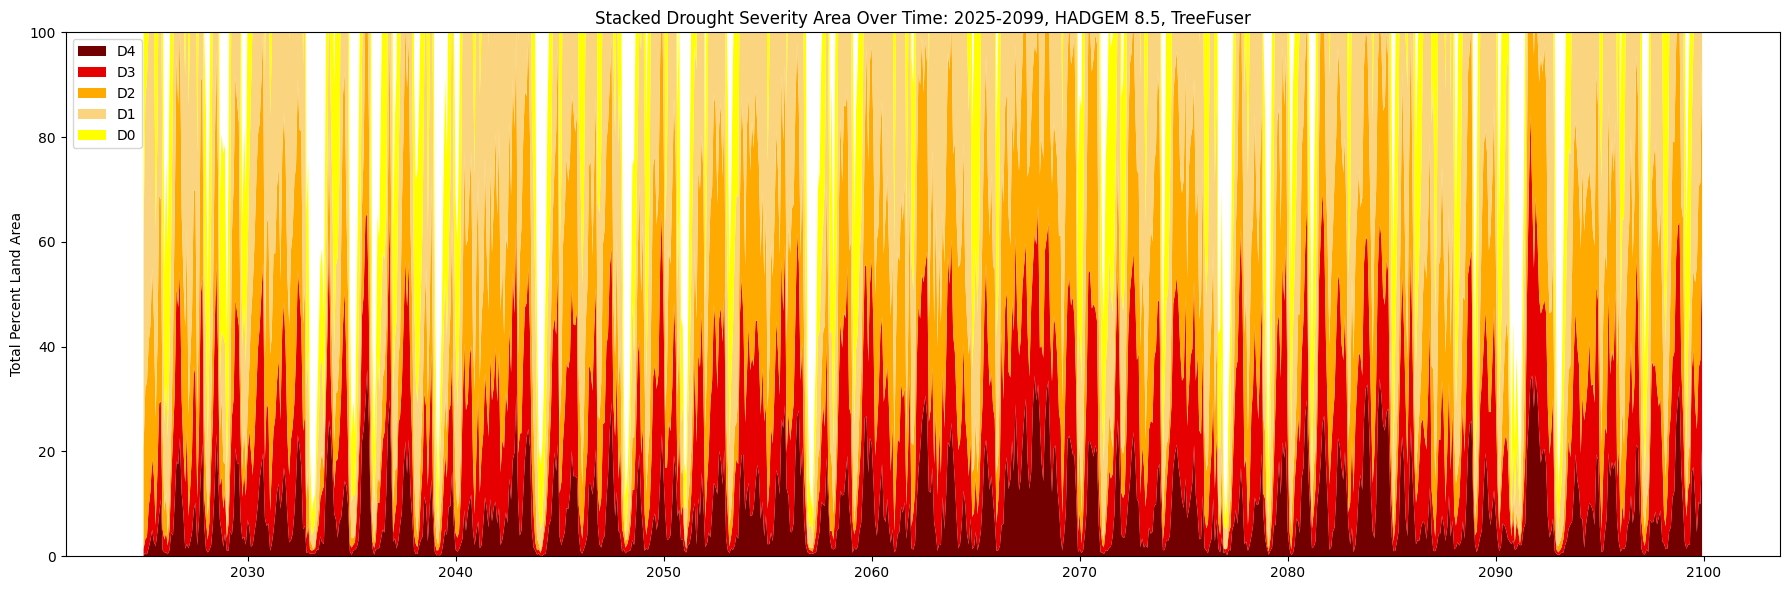

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual path if needed)
df = pd.read_csv('./results/TreeFFuser/future_drought_predictions_treeffuser.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter for 1950 to 2000
start_date = '2025-01-01'
end_date = '2099-12-01'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)


d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
# plt.stackplot(df['date'], d0, d1, d2, d3, d4,
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               colors=['#ffff00', '#fdae61', '#f46d43', '#d73027', '#7f0000'])

plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time: 2025-2099, HADGEM 8.5, TreeFuser")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


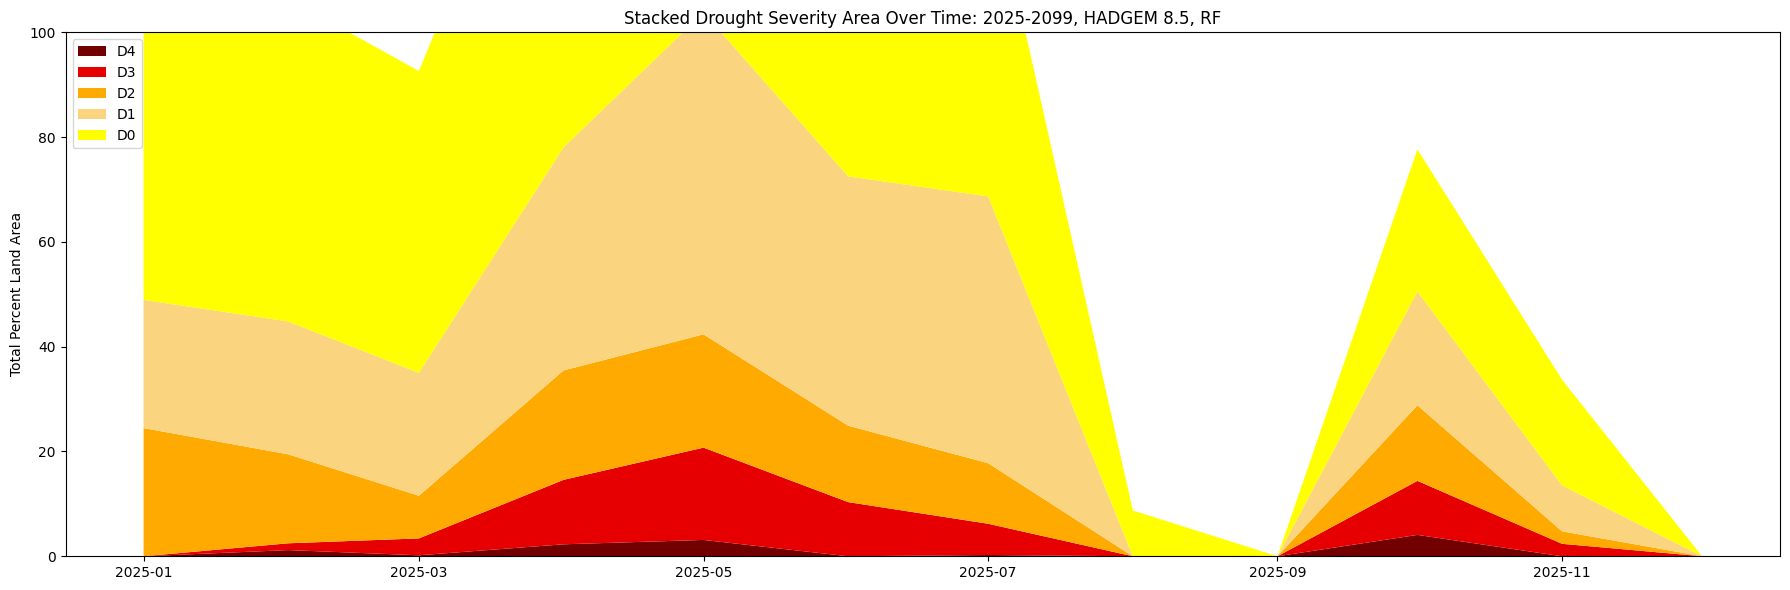

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with your actual path if needed)
df = pd.read_csv('./results/RF/future_drought_predictions.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter for 1950 to 2000
start_date = '2025-01-01'
end_date = '2025-12-01'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask].reset_index(drop=True)


d0 = df['D0']
d1 = df['D1'] 
d2 = df['D2'] 
d3 = df['D3']
d4 = df['D4'] 


# Plot
plt.figure(figsize=(18, 6))
# plt.stackplot(df['date'], d0, d1, d2, d3, d4,
#               labels=['D0', 'D1', 'D2', 'D3', 'D4'],
#               colors=['#ffff00', '#fdae61', '#f46d43', '#d73027', '#7f0000'])

plt.stackplot(df['date'], d4, d3, d2, d1, d0,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])


# Axis and labels
plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area Over Time: 2025-2099, HADGEM 8.5, RF")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


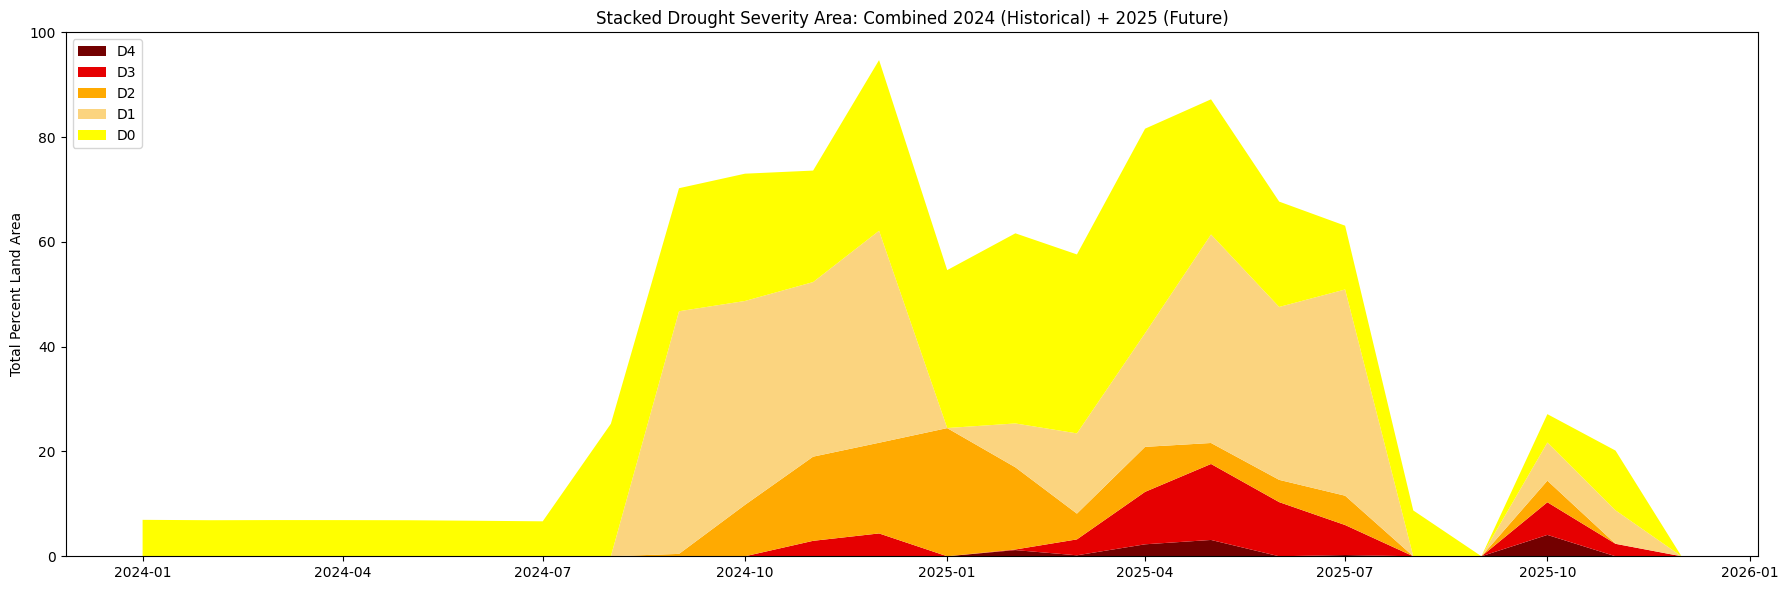

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load historical predictions and future predictions
hist_df = pd.read_csv('./final_historical.csv')
fut_df = pd.read_csv('./results/RF/future_drought_predictions.csv')

# Convert 'date' to datetime
hist_df['date'] = pd.to_datetime(hist_df['date'])
fut_df['date'] = pd.to_datetime(fut_df['date'])

# Filter for only 2024 in historical data
hist_filtered = hist_df[hist_df['date'].dt.year == 2024]

# Filter for only 2025 in future data
fut_filtered = fut_df[(fut_df['date'] >= '2025-01-01') & (fut_df['date'] <= '2025-12-31')]


# Combine into one DataFrame
combined_df = pd.concat([hist_filtered, fut_filtered], ignore_index=True)
combined_df = combined_df.sort_values(by='date').reset_index(drop=True)

# Extract values
d0 = combined_df['D0']
d1 = combined_df['D1']
d2 = combined_df['D2']
d3 = combined_df['D3']
d4 = combined_df['D4']

# Plot
plt.figure(figsize=(18, 6))
plt.stackplot(combined_df['date'], d4, d3 - d4, d2 - d3, d1 - d2, d0 - d1,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])

plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area: Combined 2024 (Historical) + 2025 (Future)")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



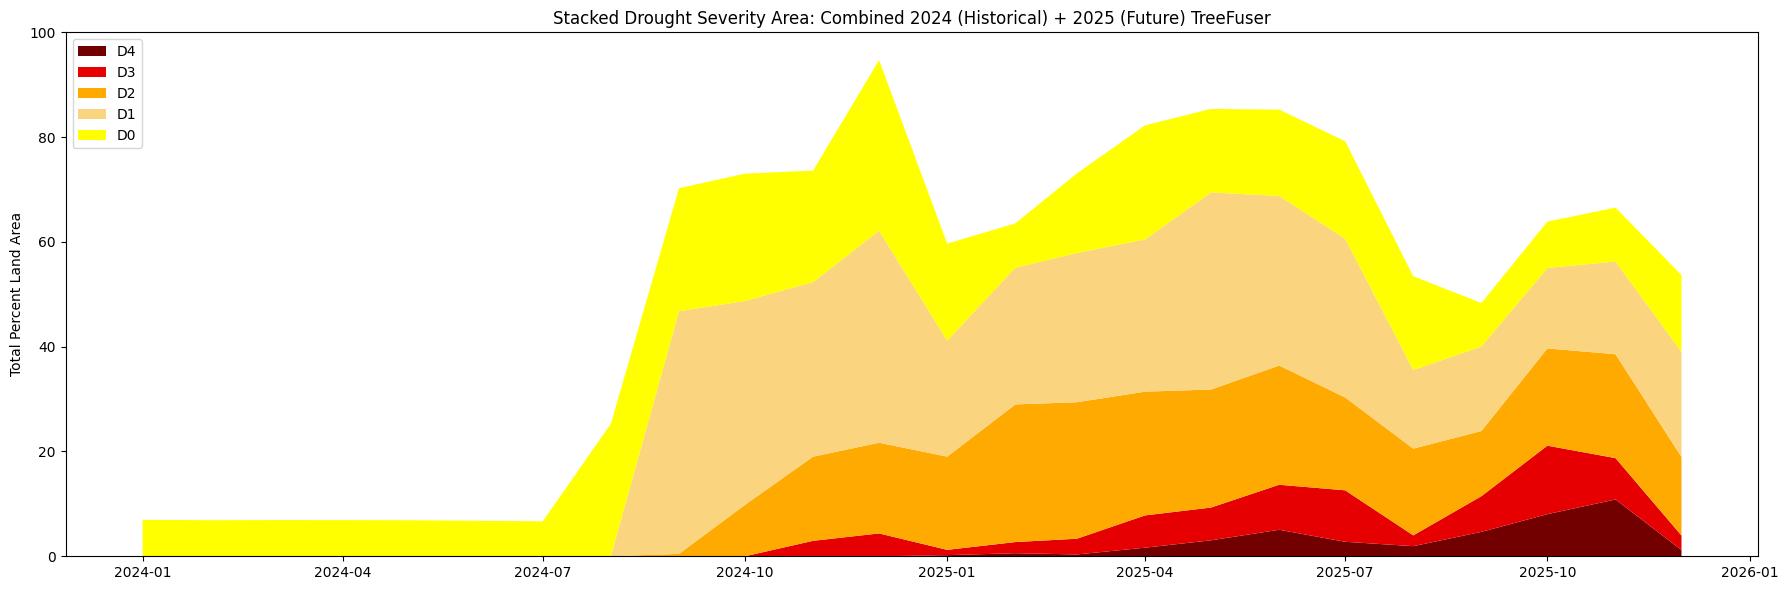

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load historical predictions and future predictions
hist_df = pd.read_csv('./final_historical.csv')
fut_df = pd.read_csv('./results/TreeFFuser/future_drought_predictions_treeffuser.csv')

# Convert 'date' to datetime
hist_df['date'] = pd.to_datetime(hist_df['date'])
fut_df['date'] = pd.to_datetime(fut_df['date'])

# Filter for only 2024 in historical data
hist_filtered = hist_df[hist_df['date'].dt.year == 2024]

# Filter for only 2025 in future data
fut_filtered = fut_df[(fut_df['date'] >= '2025-01-01') & (fut_df['date'] <= '2025-12-31')]


# Combine into one DataFrame
combined_df = pd.concat([hist_filtered, fut_filtered], ignore_index=True)
combined_df = combined_df.sort_values(by='date').reset_index(drop=True)

# Extract values
d0 = combined_df['D0']
d1 = combined_df['D1']
d2 = combined_df['D2']
d3 = combined_df['D3']
d4 = combined_df['D4']

# Plot
plt.figure(figsize=(18, 6))
plt.stackplot(combined_df['date'], d4, d3 - d4, d2 - d3, d1 - d2, d0 - d1,
              labels=['D4', 'D3', 'D2', 'D1', 'D0'],
              colors=['#730000', '#e60001', '#ffaa01', '#fbd47f', '#ffff00'])

plt.ylabel("Total Percent Land Area")
plt.title("Stacked Drought Severity Area: Combined 2024 (Historical) + 2025 (Future) TreeFuser")
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

